In [17]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline  

In [53]:
plt.rcParams["figure.figsize"] = (15, 9) # (w, h)

In [14]:
activision_file = 'activision_prepared_data.csv'
activision = pd.read_csv(activision_file, parse_dates = ['date_added'])
activision.index = activision.date_added
del activision['date_added']

In [50]:
print(len(activision.columns), "Features:")
print("-----------------------")
[print(x) for x in activision.columns];

10 Features:
-----------------------
employees_on_platform
followers_count
open_pos_count
google_trend
stock
stock_high_low_diff
trade_volume
employees_in_industry
followers_in_industry
openings_in_industry


# Scaler, PCA

In [24]:
activision_std = pd.DataFrame(StandardScaler().fit_transform(activision), columns = activision.columns)
activision_std.index = activision.index

/usr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
pca = PCA()
pca.fit(activision_std)
print('explained variance:', pca.explained_variance_)

explained variance: [4.91310149e+00 1.89738539e+00 1.22148297e+00 1.01004418e+00
 6.11232792e-01 4.97035260e-01 9.71789739e-02 2.83558479e-02
 1.50736992e-02 3.22703714e-03]


seems like about 7 of the 10 components are independent

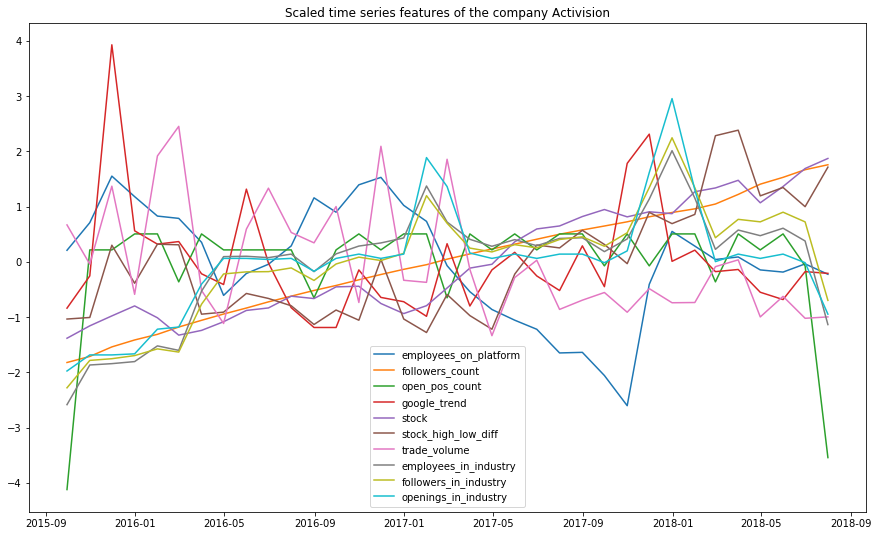

In [86]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111)
ax3 = fig1.add_subplot(111)
ax4 = fig1.add_subplot(111)
ax5 = fig1.add_subplot(111)
ax6 = fig1.add_subplot(111)
ax7 = fig1.add_subplot(111)
ax8 = fig1.add_subplot(111)

# scaling numbers are guessed
for feature in activision_std.columns:
    ax1.plot(activision_std[feature])

plt.title("Scaled time series features of the company Activision")
ax1.legend(activision_std.columns)
plt.savefig('figures/activision_timeseries.png')

# Some standard time series plots
https://machinelearningmastery.com/time-series-data-visualization-with-python/

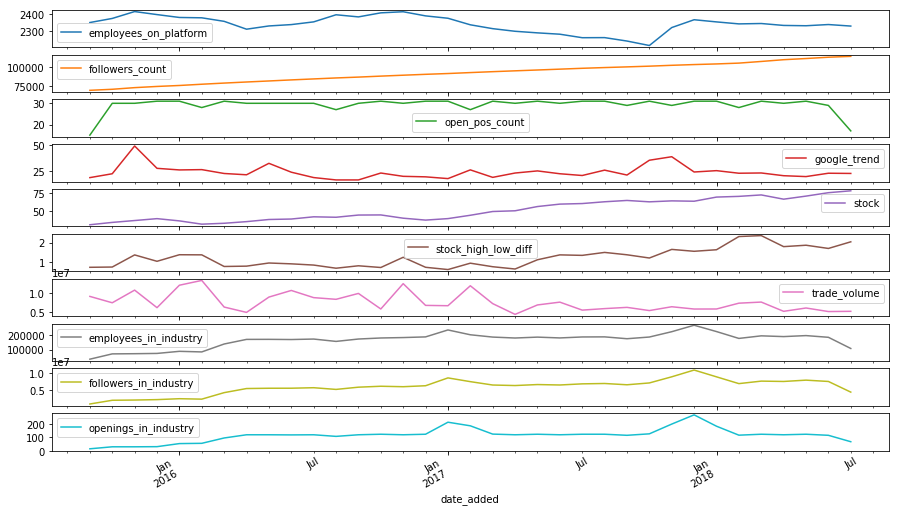

In [64]:
activision.plot(subplots = True);

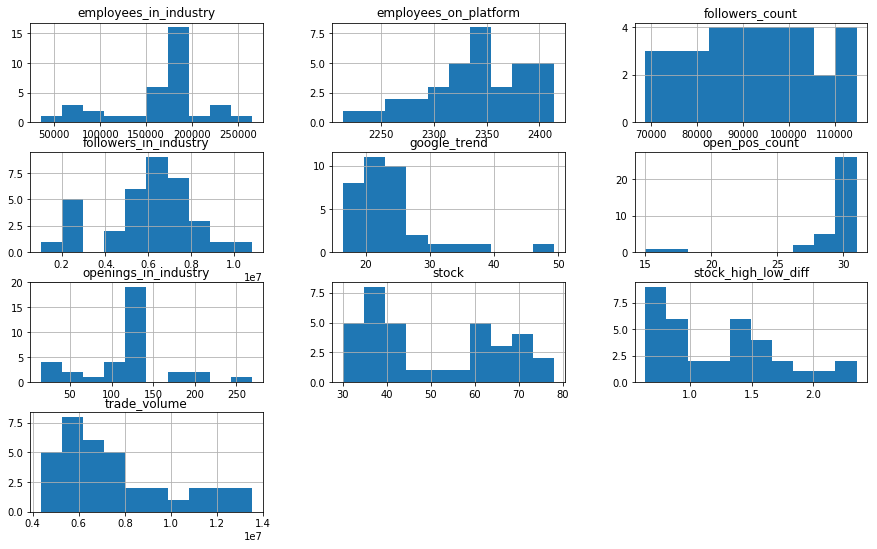

In [66]:
activision.hist();

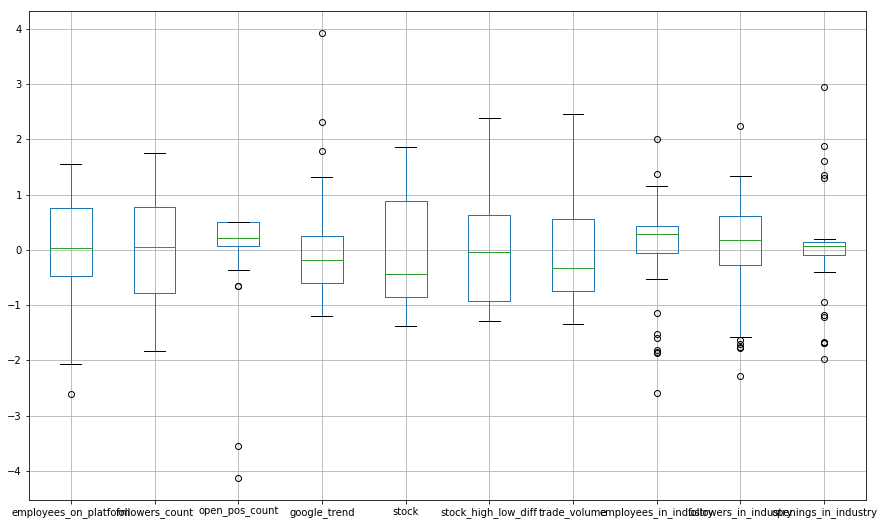

In [68]:
activision_std.boxplot();

In [80]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

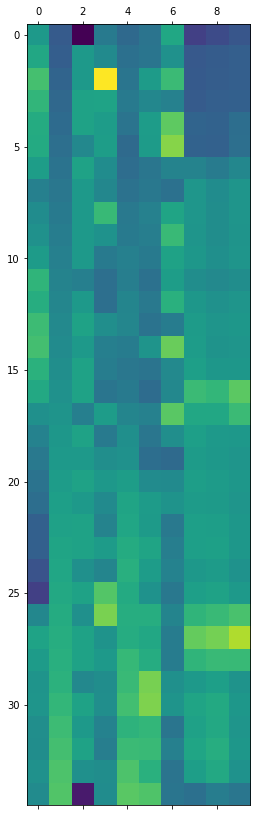

In [72]:
pyplot.matshow(activision_std,  aspect='auto')

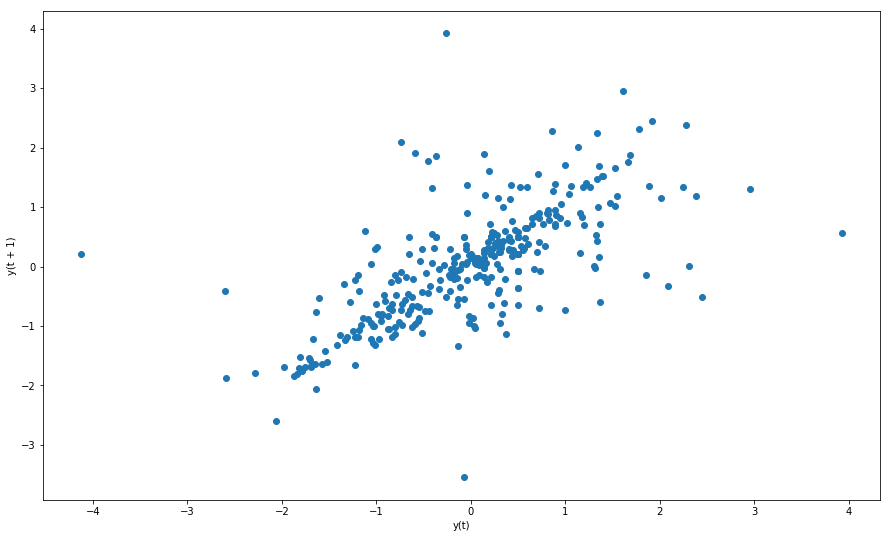

In [85]:
lag_plot(activision_std);
plt.savefig('figures/activision_lagplot.png')

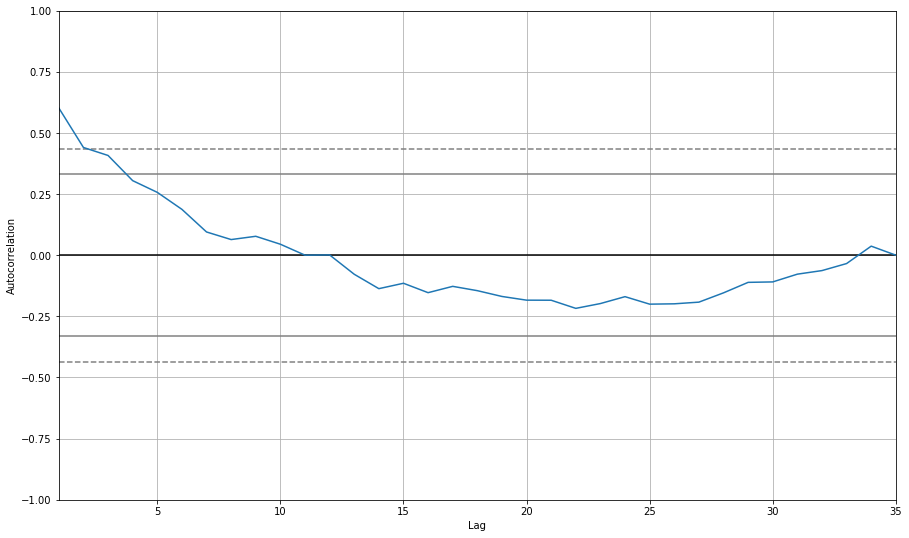

In [81]:
autocorrelation_plot(activision_std)